In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


# Handle Missing Values And Duplicates

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

723

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

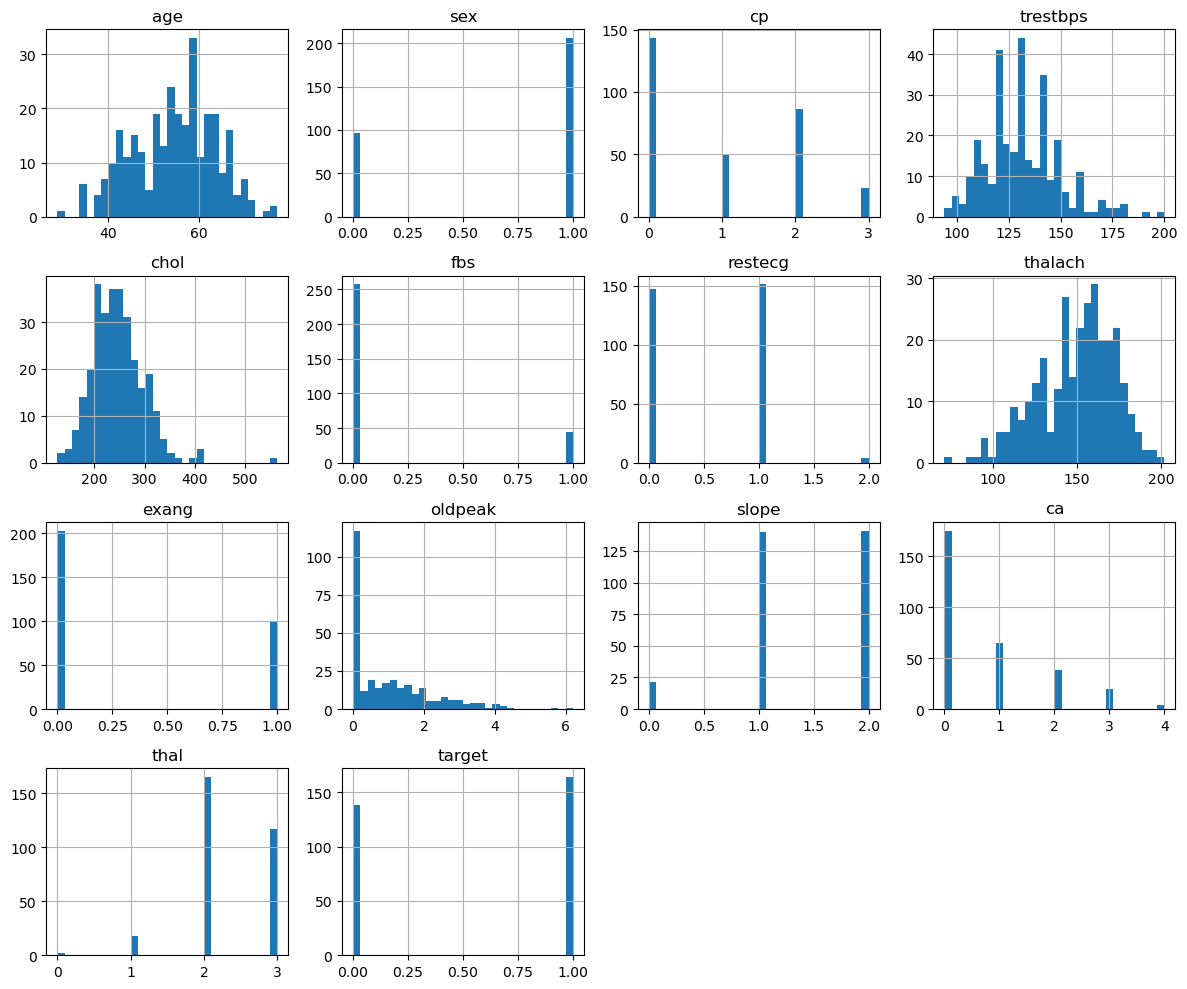

In [12]:
# Histogram for each feature
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

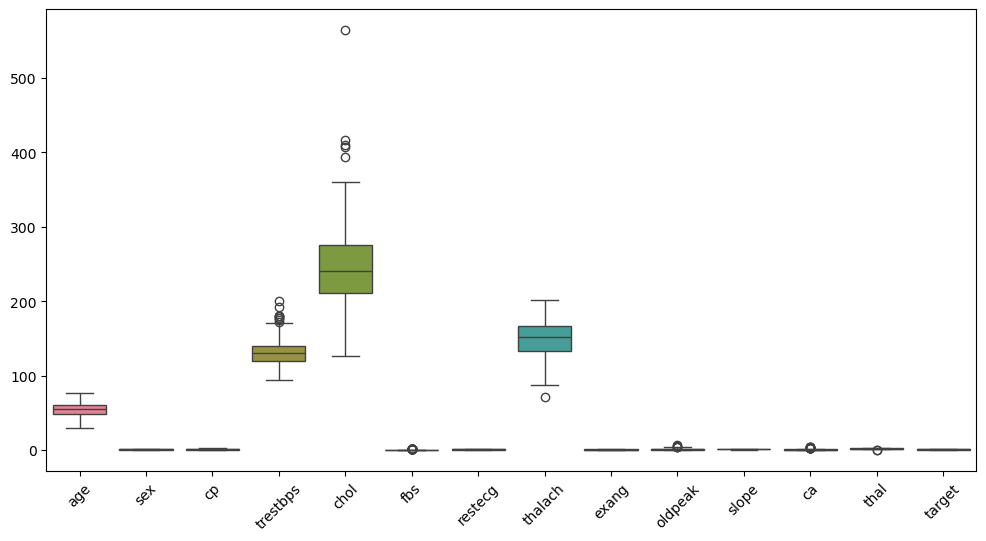

In [13]:
# Boxplot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Outlier Detection and Removal

In [15]:
rows_before_outliers = df.shape[0]
rows_before_outliers

302

In [16]:
#Z_Score
for column in df.select_dtypes(include=['number']).columns:
    # Define upper and lower limits
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    
    # Filter the DataFrame
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]

In [17]:
rows_after_outliers = df.shape[0]
rows_after_outliers

287

In [18]:
outliers = rows_before_outliers - rows_after_outliers
outliers

15

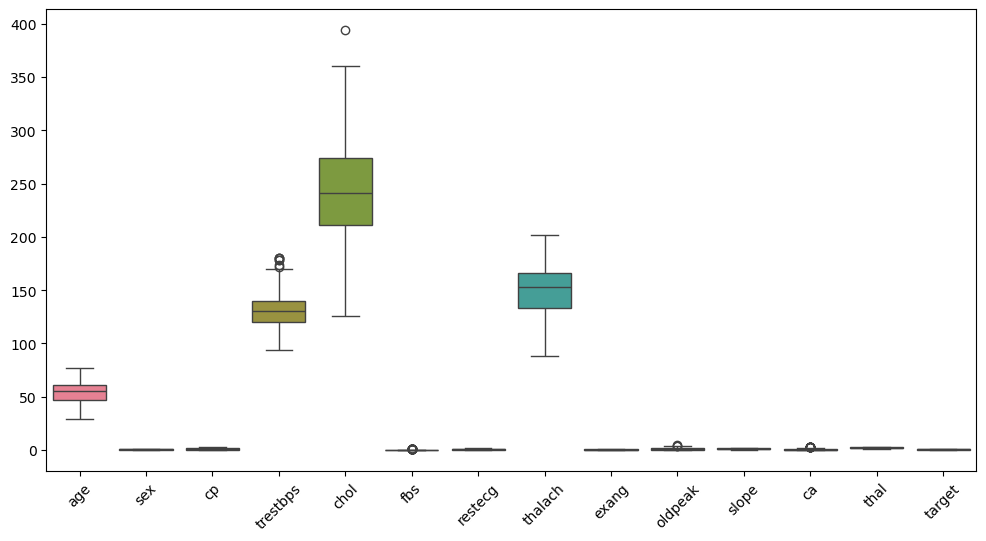

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

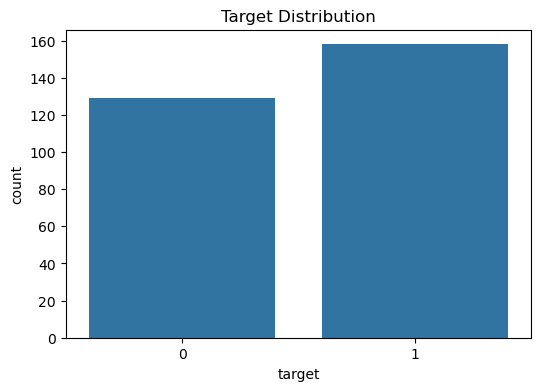

In [20]:
# Count plot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

In [21]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072391,-0.060168,0.304702,0.177192,0.133044,-0.103736,-0.400067,0.112509,0.193431,-0.155421,0.368764,0.055830,-0.226750
sex,-0.072391,1.000000,-0.054418,-0.039006,-0.141218,0.058432,-0.108164,-0.053999,0.146867,0.166430,-0.054768,0.135552,0.244047,-0.302926
cp,-0.060168,-0.054418,1.000000,0.071251,-0.098794,0.116757,0.040067,0.288385,-0.382699,-0.109039,0.079304,-0.214083,-0.152710,0.408570
trestbps,0.304702,-0.039006,0.071251,1.000000,0.143586,0.167890,-0.090480,-0.075059,0.065089,0.156988,-0.103302,0.057947,0.027382,-0.119281
chol,0.177192,-0.141218,-0.098794,0.143586,1.000000,-0.005337,-0.101245,-0.030874,0.085002,0.032452,0.011007,0.113238,0.049204,-0.099821
fbs,0.133044,0.058432,0.116757,0.167890,-0.005337,1.000000,-0.073003,-0.007962,-0.009093,0.003692,-0.046927,0.151021,-0.014622,-0.011438
restecg,-0.103736,-0.108164,0.040067,-0.090480,-0.101245,-0.073003,1.000000,0.054974,-0.072134,-0.038347,0.088423,-0.084350,0.011584,0.130079
thalach,-0.400067,-0.053999,0.288385,-0.075059,-0.030874,-0.007962,0.054974,1.000000,-0.392686,-0.353441,0.379395,-0.297154,-0.123956,0.431519
exang,0.112509,0.146867,-0.382699,0.065089,0.085002,-0.009093,-0.072134,-0.392686,1.000000,0.298277,-0.240616,0.153605,0.222884,-0.429082
oldpeak,0.193431,0.166430,-0.109039,0.156988,0.032452,0.003692,-0.038347,-0.353441,0.298277,1.000000,-0.546473,0.260600,0.175196,-0.424443


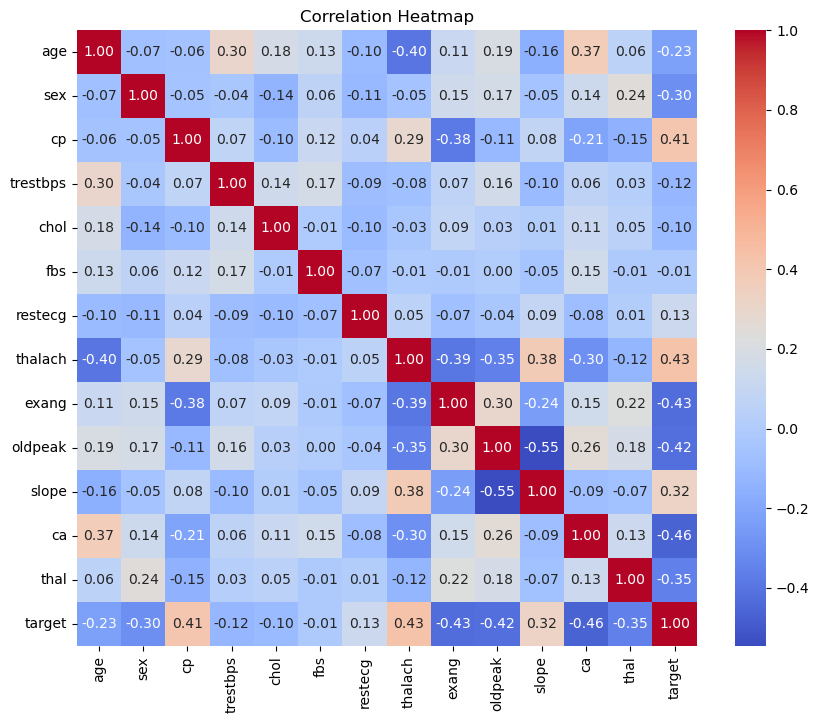

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
x = df.drop(['target'], axis=1)
y = df.target

# Scale Features

In [25]:
sc = StandardScaler()
x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']] = sc.fit_transform(x[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']])

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.257180,1,0,-0.355165,-0.709016,0,1,0.808268,0,-0.004522,0.971296,1.453275,1.175999
1,-0.147015,1,0,0.529153,-0.905348,1,0,0.230779,1,1.942086,-2.327663,-0.713426,1.175999
2,1.725795,1,0,0.823925,-1.537974,0,1,-1.101888,1,1.478608,-2.327663,-0.713426,1.175999
3,0.734307,1,0,1.000789,-0.905348,0,1,0.497312,0,-0.931478,0.971296,0.369925,1.175999
4,0.844473,0,0,0.411244,1.079790,1,1,-1.945911,0,0.829739,-0.678183,2.536626,-0.537258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.505464,0,2,-0.649938,-0.730830,0,0,-1.546110,0,0.458956,-0.678183,-0.713426,-0.537258
733,-1.138503,0,2,-1.357392,-2.257860,0,1,1.119224,0,-0.375304,-0.678183,-0.713426,-0.537258
739,-0.257180,1,0,-0.178301,0.229016,0,1,0.497312,1,-0.931478,0.971296,0.369925,1.175999
843,0.513977,1,3,1.708243,0.621681,0,0,-1.101888,0,-0.931478,0.971296,-0.713426,-0.537258


# Splitting Data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training

In [30]:
imuter = SimpleImputer(strategy='mean')

In [31]:
pipline = make_pipeline(imuter, LogisticRegression())

In [32]:
params_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [100, 200, 300]
}

In [33]:
grid_search = GridSearchCV(pipline, params_grid, cv=5, scoring='accuracy')

In [34]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__max_iter': [100, 200, 300],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [35]:
model = grid_search.best_estimator_

In [36]:
y_pred = model.predict(x_test)

# Model Evaluation

In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [39]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.89
Confusion Matrix:
[[32  9]
 [ 1 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        41
           1       0.83      0.98      0.90        46

    accuracy                           0.89        87
   macro avg       0.90      0.88      0.88        87
weighted avg       0.90      0.89      0.88        87



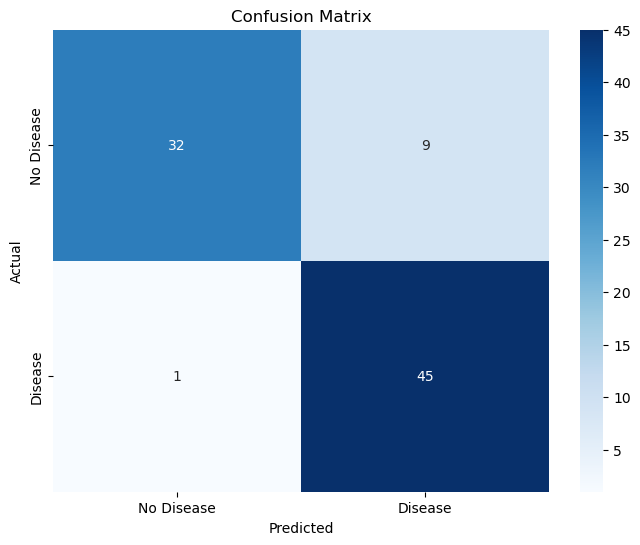

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='Blues',
           xticklabels=['No Disease','Disease'],
           yticklabels=['No Disease','Disease'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()